In [1]:
import cv2
import numpy as np
from PIL import Image

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:

a = cv2.imread("in44.png")
img1 = a.copy()
img1[:,:,0] = cv2.normalize(a[:,:,0], dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
img1[:,:,1] = cv2.normalize(a[:,:,1], dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
img1[:,:,2] = cv2.normalize(a[:,:,2], dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
g_img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
#g_img = cv2.equalizeHist(g_img)
img = g_img.copy()
#g_img = cv2.normalize(g_img, dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

In [4]:
from collections import Counter
ret1,th1 = cv2.threshold(g_img,50,255,cv2.THRESH_BINARY)
blur = cv2.GaussianBlur(th1,(5,5),0)
ret2,th2 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

a_img=th2&img

nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(a_img, connectivity=4)
sizes = stats[:, -1]

max_label = 1
max_mean = np.mean(a_img[output==1])

for i in range(2, nb_components):
    mean=np.mean(a_img[output==i])
    if mean > max_mean and sizes[i]>1500 :
        max_label = i
        max_mean = mean

img3 = np.zeros(output.shape)
img3[output == max_label] = 255
print(stats[max_label])

[ 123  123  152  152 6222]


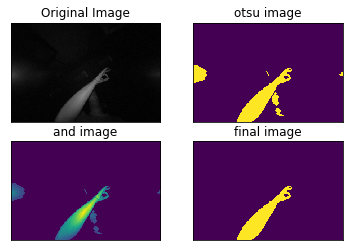

In [5]:

# Otsu's thresholding after Gaussian filtering

titles = ['Original Image','otsu image','and image','final image']
images = [a,th2,a_img,img3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

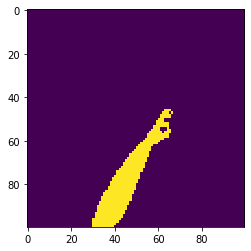

In [6]:

new_image = img3[stats[max_label][1]:stats[max_label][1]+stats[max_label][3],stats[max_label][0]:stats[max_label][0]+stats[max_label][2]]
image_for_input = cv2.resize(img3, (100, 100),  
               interpolation = cv2.INTER_NEAREST)
plt.imshow(image_for_input)